# DecisionTreeClassifier
DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import numpy as np

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size=0.2,
                                                   random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred), 4)

print(pred, accuracy)

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1] 0.9333


In [2]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [3]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## graphviz를 활용한 tree 확인

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 새성함
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
               feature_names=iris_data.feature_names, impurity=True, filled=True)

In [34]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

Feature importances:
[0.    0.    0.558 0.442]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<AxesSubplot:>

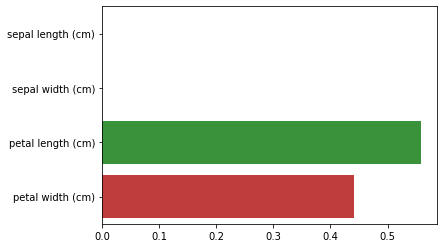

In [25]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### max_depth = 3

In [24]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size=0.2,
                                                   random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred), 4)

print(pred, accuracy)

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1] 0.9333


In [26]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 새성함
export_graphviz(dt_clf, out_file='tree.dot_max_depth3', class_names=iris_data.target_names, \
               feature_names=iris_data.feature_names, impurity=True, filled=True)

##### min_smaples_split = 4

In [29]:
dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size=0.2,
                                                   random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred), 4)

print(pred, accuracy)

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1] 0.9333


In [30]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 새성함
export_graphviz(dt_clf, out_file='tree.dot_min_samples_split4', class_names=iris_data.target_names, \
               feature_names=iris_data.feature_names, impurity=True, filled=True)

### min_samples_leaf4

In [33]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size=0.2,
                                                   random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred), 4)

print(pred, accuracy)

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1] 0.9333


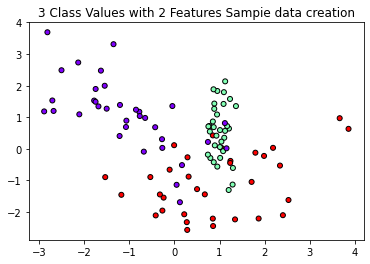

In [31]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class Values with 2 Features Sampie data creation')

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter (X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow',edgecolor='k')

In [28]:
import numpy as np

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    ax.scatter(X[:,0], X[:,1], c=y, s=25, cmap='rainbow', edgecolor='k',
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_srart, ylim_end = ax.get_ylim()
    
    model.fit(X,y)
    
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                        np.linspace(ylim_srart, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          levels=np.arange(n_classes + 1)-0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

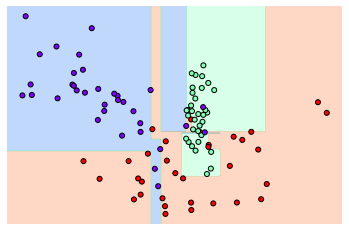

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

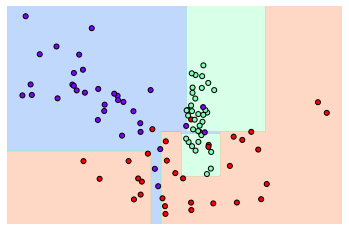

In [32]:
dt_clf = DecisionTreeClassifier(min_samples_split=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

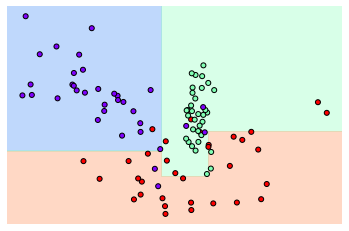

In [35]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [1]:
print('Hello')

Hello
